# Homework 4 - Manifold Learning

This is an individual assignment.

**Due: Friday, April 3, 11:59 PM**

## Grading Rubric

1. **Problem 1 (60 pts)**
    * Code implementation of MDS (20 pts)
    * Code implementation of ISOMAP (20 pts)
    * Code implementation of LLE (20 pts)
    
2. **Problem 2 (40 pts)** 
    * You've used your code to projected all provided data sets to 2-D and provided the appropriated discussions

**Total: 100 pts**

# Manifold Learning

In this assignment, you will explore manifold learning. You have been given 3 data sets with varying original dimensionality in each.

1. **Clusters Data Set:** (or "Gaussian clouds) this data set is 10-dimensional. **Goal:** It contains three groups of data that where each group should be classified into separate classes.

2. **Swiss Roll Data Set:** this data set is 3-dimensional. **Goal:** One group of data where neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface should remain far from each other after dimensionality reduction.

3. **Half moons Data Set:** this data is 3-dimensional. **Goal:** Two groups of data that where each group should be classified into a separate class.

Here are the data sets:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15, 4))

#Load Clusters
clusters = np.loadtxt('clusters.txt') 
X1_labels = clusters[:,10] 
X1 = clusters[:,0:10]
print('Clusters Data Set:', X1.shape)
ax = fig.add_subplot(131, projection='3d')
for i in range(1,4):
    ax.plot3D(X1[X1_labels==i,0],X1[X1_labels==i,1], X1[X1_labels==i,2],'o');
plt.title('Clusters Data Set');

# Load Data Swissroll
X2 = np.loadtxt('swissroll.txt') 
print('Swissroll Data Set: ', X2.shape)
ax = fig.add_subplot(132, projection='3d')
ax.plot3D(X2[:,0],X2[:,1], X2[:,2],'o');
plt.title('Swissroll Data Set');

#Load Halfmoons
halfmoons = np.loadtxt('halfmoons.txt') 
X3_labels = halfmoons[:,3] 
X3 = halfmoons[:,0:3]
print('Halfmoons Data Set: ',X3.shape)
ax = fig.add_subplot(133, projection='3d')
for i in range(1,4):
    ax.plot3D(X3[X3_labels==i,0],X3[X3_labels==i,1], X3[X3_labels==i,2],'o');
plt.title('Halfmoons Data Set');

# Problem 1

Implement classic MDS, ISOMAP and LLE. 

You should implement these models from scratch. To aid you in this implementation, you can use the follwing functions:

* ```NearestNeighbors``` from the module ```sklearn.neighbors```. This will help in computing neighbors of points.
* ```pdist``` from ```scipy.spatial.distance```. This will help computing pairwise distances between points. 
* ```squareform``` from ```scipy.spatial.distance```. This will help converting the pairwise distances into a square matrix.
* ```numpy``` library (includes linear algebra modules).

# Problem 2

Using your code, project each data set down to 2-dimensions using classic MDS, ISOMAP and LLE.

Include a discussion describing whether you think MDS, ISOMAP and LLE are able to identify the intrinsic "manifold" structure of the data with an explanation of why or why not. Be sure this discussion addresses the "goal" of the data set outlined above.

## Submit your Solution

Create a PDF of the notebook with your solutions.

Submit both your notebook and the PDF of your notebook to Homework 4 assignment page on Canvas.

* For full credit consideration, make sure all output cells do not show any errors and all code is visible.

In [77]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
import sys
from sklearn.manifold import Isomap
from sklearn.neighbors import NearestNeighbors

## MDS Code Implementation

In [78]:
# Compute the distance matrix
# Matrix that stores pairwise distances of each other
# Compute for X1 initially
def MDS_user(X1):
    D = pdist(X1, metric='euclidean')
    D = squareform(D, force='no', checks=True)
#print(D.shape)
    D2 = np.square(D)
    N = len(D)
    one = np.ones(N)
    L = one@one.T
    res = np.array([ [ 1 for i in range(N) ] for j in range(N) ] )
    print("This is L:", L)
    J = np.identity(N)-res/N
#print(J)
    B = -J@D2@J/2
#print(B)
    e_val, e_vec = LA.eig(B)
    idx = e_val.argsort()[::-1]   
#print(idx)
    eigenValues = e_val[idx]
    eigenVectors = e_vec[:,idx]
    print(eigenValues.shape)
    eigen_vectors = eigenVectors[:,:2]
    print(eigen_vectors.shape)
    eigen_values = np.diag(eigenValues[:2])
    print(eigen_values.shape)
    Y = eigen_vectors@np.sqrt(eigen_values)
    print(Y.shape)
    return Y
#print(X1.shape)

## MDS Visualization on Clusters DataSet

This is L: 600.0
(600,)
(600, 2)
(2, 2)
(600, 2)
(600, 2)
(600, 2)


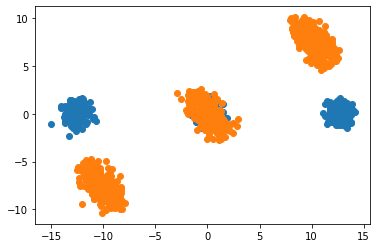

In [79]:
Z = MDS_user(X1)
print(Z.shape)
plt.scatter(Z[:,0],Z[:,1])
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X1[:600])
print(X_transformed.shape)
plt.scatter(X_transformed[:,0],X_transformed[:,1])

In [117]:
def FloydWarshal(distance):
    N = len(distance)
    for k in range(N):
        for i in range(N):
            for j in range(N):
                if(distance[i][k]+distance[k][j]<distance[i][j]):
                    distance[i][j] = distance[i][k]+distance[k][j]
    return distance
    

## IsoMap Code Implementation

In [131]:
def IsoMap_user(data,neighbors,data_label):
# Compute distance matrix
    nbrs = NearestNeighbors(n_neighbors=neighbors, algorithm='auto').fit(data)
    distances, indices = nbrs.kneighbors(data)
#print(data)  
    N = len(indices)
    M = len(indices[0])
    Dg = np.array([ [ np.inf for i in range(N) ] for j in range(N) ])
    for i in range(N):
        for j in range(M):
            z=indices[i][j]
            Dg[i][z] = distances[i][j]
    DG = FloydWarshal(Dg)
    #print(Dg)
    res = np.array([ [ 1 for i in range(N) ] for j in range(N) ] )
    J = np.identity(N)-res/N
    B = -J@DG**2@J/2
    e_val, e_vec = LA.eig(B)
    idx = e_val.argsort()[::-1]   
    eigenValues = e_val[idx]
    eigenVectors = e_vec[:,idx]
    eigen_vectors = eigenVectors[:,:2]
    eigen_values = np.diag(eigenValues[:2])
    Y = eigen_vectors@np.sqrt(eigen_values)
    plt.scatter(Y[:,0],Y[:,1],c = data_label)

In [132]:
IsoMap_user(X1,201,X1_labels)

KeyboardInterrupt: 

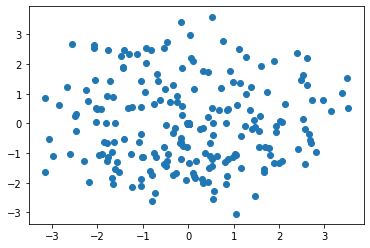

In [65]:
embedding = Isomap(n_components=2)
N = len(X1)
X_transformed = embedding.fit_transform(X1[:N])
plt.scatter(X_transformed[:,0],X_transformed[:,1])